# Word Embeddings and Tokenization: From Text to Vectors

**Yale Graduate Student AI Workshop - Notebook 1**  
*Timothy Thompson, Metadata Services Unit, Yale Library*

---

## Learning Objectives

By the end of this notebook, you will understand:

1. How tokenization breaks text into processable units
2. The core principles behind Word2Vec embeddings  
3. How semantic relationships emerge in vector space
4. Why vector arithmetic captures meaning relationships
5. How to apply these concepts to real library metadata

---

## The Central Question

How can we teach computers to understand that **"king"** and **"queen"** are related in the same way that **"man"** and **"woman"** are related?

This fundamental question drives everything we'll explore today. The answer lies in transforming words into mathematical vectors that capture semantic meaning.

In [1]:
# Setup and Installation
# Run this cell first to install required packages in Google Colab

!pip install gensim matplotlib numpy pandas scikit-learn plotly wordcloud seaborn

print("✅ Installation complete!")
print("📚 Ready to explore word embeddings")


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
✅ Installation complete!
📚 Ready to explore word embeddings


In [2]:
# Import all the libraries we'll need throughout this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import re
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')

# Configure plotting for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Libraries imported successfully!")
print("🎯 Ready to dive into tokenization and embeddings")

✅ Libraries imported successfully!
🎯 Ready to dive into tokenization and embeddings


---

# Part 1: Understanding Tokenization

Before we can create embeddings, we need to understand how computers break down human language into processable pieces. This process is called **tokenization**.

Think of tokenization as teaching a computer to read by showing it how to break sentences into words, much like how we put spaces between words when we write.

## Why Tokenization Matters

Computers don't naturally understand text the way humans do. They need structured, discrete units to work with. Tokenization transforms continuous text into these discrete units (tokens) that can be mathematically processed.

In [3]:
# Let's start with sample library catalog records similar to Yale's entity resolution data
# These represent the kind of real-world text we work with in digital humanities

sample_records = [
    "Schubert, Franz, 1797-1828. Winterreise: song cycle for voice and piano",
    "Bach, Johann Sebastian, 1685-1750. The Well-Tempered Clavier: preludes and fugues",
    "Mozart, Wolfgang Amadeus, 1756-1791. Don Giovanni: opera in two acts",
    "Beethoven, Ludwig van, 1770-1827. Symphony No. 9 in D minor",
    "Chopin, Frédéric, 1810-1849. Nocturnes for piano solo",
    "Darwin, Charles, 1809-1882. On the Origin of Species by Natural Selection",
    "Einstein, Albert, 1879-1955. Relativity: The Special and General Theory",
    "Curie, Marie, 1867-1934. Radioactive Substances and Their Radiations"
]

print("📖 Sample Library Catalog Records:")
print("=" * 50)
for i, record in enumerate(sample_records, 1):
    print(f"{i}. {record}")
    
print(f"\n✅ We have {len(sample_records)} sample records to work with")

📖 Sample Library Catalog Records:
1. Schubert, Franz, 1797-1828. Winterreise: song cycle for voice and piano
2. Bach, Johann Sebastian, 1685-1750. The Well-Tempered Clavier: preludes and fugues
3. Mozart, Wolfgang Amadeus, 1756-1791. Don Giovanni: opera in two acts
4. Beethoven, Ludwig van, 1770-1827. Symphony No. 9 in D minor
5. Chopin, Frédéric, 1810-1849. Nocturnes for piano solo
6. Darwin, Charles, 1809-1882. On the Origin of Species by Natural Selection
7. Einstein, Albert, 1879-1955. Relativity: The Special and General Theory
8. Curie, Marie, 1867-1934. Radioactive Substances and Their Radiations

✅ We have 8 sample records to work with


In [4]:
# Simple tokenization: splitting text into words
# This is the most basic form of tokenization

def simple_tokenize(text):
    """Basic tokenization by splitting on whitespace and removing punctuation."""
    # Convert to lowercase for consistency
    text = text.lower()
    # Remove punctuation and split on whitespace
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# Let's see how this works on our first record
first_record = sample_records[0]
tokens = simple_tokenize(first_record)

print("🔍 Tokenization Example:")
print("=" * 40)
print(f"Original text: {first_record}")
print(f"\nTokens: {tokens}")
print(f"\nNumber of tokens: {len(tokens)}")

# Show the transformation visually
print("\n📋 Token-by-token breakdown:")
for i, token in enumerate(tokens, 1):
    print(f"{i:2d}. '{token}'")

🔍 Tokenization Example:
Original text: Schubert, Franz, 1797-1828. Winterreise: song cycle for voice and piano

Tokens: ['schubert', 'franz', '1797', '1828', 'winterreise', 'song', 'cycle', 'for', 'voice', 'and', 'piano']

Number of tokens: 11

📋 Token-by-token breakdown:
 1. 'schubert'
 2. 'franz'
 3. '1797'
 4. '1828'
 5. 'winterreise'
 6. 'song'
 7. 'cycle'
 8. 'for'
 9. 'voice'
10. 'and'
11. 'piano'


In [5]:
# Now let's tokenize all our records and build a vocabulary
# This creates the foundation for our word embeddings

def build_vocabulary(texts):
    """Build a vocabulary from a collection of texts."""
    all_tokens = []
    tokenized_texts = []
    
    # Tokenize each text and collect all tokens
    for text in texts:
        tokens = simple_tokenize(text)
        tokenized_texts.append(tokens)
        all_tokens.extend(tokens)
    
    # Count token frequencies
    token_counts = Counter(all_tokens)
    
    # Create vocabulary (unique tokens)
    vocabulary = list(token_counts.keys())
    
    return tokenized_texts, vocabulary, token_counts

# Build our vocabulary from the sample records
tokenized_records, vocabulary, token_counts = build_vocabulary(sample_records)

print("📚 Vocabulary Analysis:")
print("=" * 30)
print(f"Total unique words (vocabulary size): {len(vocabulary)}")
print(f"Total tokens across all records: {sum(token_counts.values())}")

print("\n🔢 Most common words:")
for word, count in token_counts.most_common(10):
    print(f"  '{word}': {count} times")

print("\n🎯 Complete vocabulary:")
print(sorted(vocabulary))

📚 Vocabulary Analysis:
Total unique words (vocabulary size): 76
Total tokens across all records: 84

🔢 Most common words:
  'and': 4 times
  'the': 3 times
  'for': 2 times
  'piano': 2 times
  'in': 2 times
  'schubert': 1 times
  'franz': 1 times
  '1797': 1 times
  '1828': 1 times
  'winterreise': 1 times

🎯 Complete vocabulary:
['1685', '1750', '1756', '1770', '1791', '1797', '1809', '1810', '1827', '1828', '1849', '1867', '1879', '1882', '1934', '1955', '9', 'acts', 'albert', 'amadeus', 'and', 'bach', 'beethoven', 'by', 'charles', 'chopin', 'clavier', 'curie', 'cycle', 'd', 'darwin', 'don', 'einstein', 'for', 'franz', 'frédéric', 'fugues', 'general', 'giovanni', 'in', 'johann', 'ludwig', 'marie', 'minor', 'mozart', 'natural', 'no', 'nocturnes', 'of', 'on', 'opera', 'origin', 'piano', 'preludes', 'radiations', 'radioactive', 'relativity', 'schubert', 'sebastian', 'selection', 'solo', 'song', 'special', 'species', 'substances', 'symphony', 'tempered', 'the', 'their', 'theory', 'two'

## Key Insight: From Discrete Tokens to Vector Space

Notice that we now have a **finite vocabulary** of unique words. This is crucial because it means we can represent any word in our corpus as a specific position in a mathematical space.

But here's the big question: **How do we capture the meaning relationships between these words?**

That's where Word2Vec comes in.

---

# Part 2: Word2Vec Fundamentals

Word2Vec revolutionized natural language processing by discovering that **words that appear in similar contexts tend to have similar meanings**.

## The Core Intuition

Consider these sentences:
- "The **king** ruled the kingdom with wisdom"
- "The **queen** ruled the kingdom with wisdom"
- "The **monarch** ruled the kingdom with wisdom"

Because "king," "queen," and "monarch" appear in similar contexts, Word2Vec learns that they should have similar vector representations.

## Two Training Approaches

1. **Skip-gram**: Given a word, predict its surrounding context words
2. **CBOW (Continuous Bag of Words)**: Given context words, predict the center word

We'll demonstrate with a simple implementation to build understanding.

In [6]:
# Let's create a larger, more diverse corpus for training Word2Vec
# This includes the relationships we want to capture: king/queen, man/woman

extended_corpus = [
    # Royal and gender relationships
    "the king ruled the kingdom with great wisdom and power",
    "the queen governed the realm with intelligence and grace",
    "a man walked through the forest in the morning",
    "a woman traveled across the mountains at sunrise",
    "the king and queen lived in a magnificent palace",
    "the man and woman worked together on the project",
    
    # Musical compositions (from our library records)
    "schubert composed beautiful songs for voice and piano",
    "bach wrote complex fugues and preludes for keyboard",
    "mozart created operas and symphonies for orchestra",
    "beethoven composed powerful symphonies and sonatas",
    
    # Scientific works
    "darwin studied evolution and natural selection",
    "einstein developed theories of relativity and physics",
    "curie researched radioactivity and chemical elements",
    
    # Geographic and directional relationships
    "paris is the capital of france in europe",
    "rome is the capital of italy in europe",
    "london is the capital of england in europe",
    "berlin is the capital of germany in europe",
    
    # Temporal relationships
    "yesterday was before today and tomorrow comes after",
    "morning comes before afternoon and evening follows",
    "spring precedes summer and autumn follows winter",
]

print("📖 Extended Training Corpus:")
print("=" * 40)
for i, sentence in enumerate(extended_corpus, 1):
    print(f"{i:2d}. {sentence}")
    
print(f"\n✅ Training corpus contains {len(extended_corpus)} sentences")

📖 Extended Training Corpus:
 1. the king ruled the kingdom with great wisdom and power
 2. the queen governed the realm with intelligence and grace
 3. a man walked through the forest in the morning
 4. a woman traveled across the mountains at sunrise
 5. the king and queen lived in a magnificent palace
 6. the man and woman worked together on the project
 7. schubert composed beautiful songs for voice and piano
 8. bach wrote complex fugues and preludes for keyboard
 9. mozart created operas and symphonies for orchestra
10. beethoven composed powerful symphonies and sonatas
11. darwin studied evolution and natural selection
12. einstein developed theories of relativity and physics
13. curie researched radioactivity and chemical elements
14. paris is the capital of france in europe
15. rome is the capital of italy in europe
16. london is the capital of england in europe
17. berlin is the capital of germany in europe
18. yesterday was before today and tomorrow comes after
19. morning co

In [7]:
# Prepare the corpus for Word2Vec training
# We need to tokenize each sentence

def prepare_corpus_for_word2vec(sentences):
    """Tokenize sentences for Word2Vec training."""
    tokenized_corpus = []
    for sentence in sentences:
        tokens = simple_tokenize(sentence)
        tokenized_corpus.append(tokens)
    return tokenized_corpus

# Prepare our corpus
training_corpus = prepare_corpus_for_word2vec(extended_corpus)

print("🔧 Tokenized Training Corpus:")
print("=" * 35)
for i, tokens in enumerate(training_corpus[:5], 1):  # Show first 5 examples
    print(f"{i}. {tokens}")

print(f"\n... and {len(training_corpus)-5} more sentences")

# Calculate corpus statistics
all_tokens = [token for sentence in training_corpus for token in sentence]
corpus_vocab = set(all_tokens)

print(f"\n📊 Corpus Statistics:")
print(f"Total sentences: {len(training_corpus)}")
print(f"Total tokens: {len(all_tokens)}")
print(f"Unique words: {len(corpus_vocab)}")
print(f"Average sentence length: {len(all_tokens)/len(training_corpus):.1f} tokens")

🔧 Tokenized Training Corpus:
1. ['the', 'king', 'ruled', 'the', 'kingdom', 'with', 'great', 'wisdom', 'and', 'power']
2. ['the', 'queen', 'governed', 'the', 'realm', 'with', 'intelligence', 'and', 'grace']
3. ['a', 'man', 'walked', 'through', 'the', 'forest', 'in', 'the', 'morning']
4. ['a', 'woman', 'traveled', 'across', 'the', 'mountains', 'at', 'sunrise']
5. ['the', 'king', 'and', 'queen', 'lived', 'in', 'a', 'magnificent', 'palace']

... and 15 more sentences

📊 Corpus Statistics:
Total sentences: 20
Total tokens: 156
Unique words: 97
Average sentence length: 7.8 tokens


In [8]:
# Now let's train a Word2Vec model using Gensim
# Gensim provides an efficient, well-tested implementation

from gensim.models import Word2Vec

print("🚀 Training Word2Vec Model...")
print("=" * 35)

# Train the Word2Vec model
# Parameters explained:
# - sentences: our tokenized corpus
# - vector_size: dimensionality of word vectors (100 is good for small corpus)
# - window: maximum distance between current and predicted word
# - min_count: ignore words that appear fewer than this many times
# - sg: 1 for skip-gram, 0 for CBOW
# - epochs: number of training iterations

model = Word2Vec(
    sentences=training_corpus,
    vector_size=100,        # 100-dimensional vectors
    window=5,               # Context window of 5 words
    min_count=1,            # Include all words (small corpus)
    sg=1,                   # Use skip-gram
    epochs=100,             # Train for 100 epochs
    seed=42                 # For reproducible results
)

print("✅ Model training complete!")
print(f"📚 Vocabulary size: {len(model.wv.key_to_index)}")
print(f"📐 Vector dimensions: {model.wv.vector_size}")

# Show some words in our trained vocabulary
print(f"\n🔤 Sample vocabulary: {list(model.wv.key_to_index.keys())[:15]}")

🚀 Training Word2Vec Model...
✅ Model training complete!
📚 Vocabulary size: 97
📐 Vector dimensions: 100

🔤 Sample vocabulary: ['the', 'and', 'in', 'of', 'is', 'capital', 'europe', 'for', 'a', 'comes', 'man', 'woman', 'follows', 'with', 'king']


---

# Part 3: The Magic of Vector Arithmetic

Now comes the exciting part: demonstrating that our Word2Vec model has learned semantic relationships that we can manipulate mathematically.

## The Famous Example: King - Man + Woman = Queen

This isn't just a mathematical trick—it represents a profound insight about how meaning relationships can be captured in vector space.

In [9]:
# Let's test the famous vector arithmetic: king - man + woman ≈ queen

def test_vector_arithmetic(model, word1, word2, word3, top_n=5):
    """
    Test vector arithmetic: word1 - word2 + word3 = ?
    Returns the most similar words to the result.
    """
    try:
        # Perform the vector arithmetic
        result = model.wv.most_similar(
            positive=[word1, word3],  # Add these vectors
            negative=[word2],         # Subtract this vector
            topn=top_n
        )
        return result
    except KeyError as e:
        return f"Word not in vocabulary: {e}"

print("👑 Testing the Famous Vector Arithmetic!")
print("=" * 45)

# Test: king - man + woman = ?
print("🧮 Computing: king - man + woman = ?")
result = test_vector_arithmetic(model, 'king', 'man', 'woman')

if isinstance(result, list):
    print("\n🎯 Results (word, similarity_score):")
    for i, (word, score) in enumerate(result, 1):
        print(f"{i}. {word}: {score:.3f}")
        
    # Check if 'queen' is the top result
    if result[0][0] == 'queen':
        print("\n🎉 SUCCESS! The model learned king - man + woman = queen!")
    else:
        print(f"\n🤔 Top result is '{result[0][0]}', not 'queen' as expected")
        print("This might be due to our small training corpus")
else:
    print(f"\n❌ Error: {result}")

👑 Testing the Famous Vector Arithmetic!
🧮 Computing: king - man + woman = ?

🎯 Results (word, similarity_score):
1. the: 0.943
2. comes: 0.940
3. and: 0.938
4. piano: 0.935
5. for: 0.934

🤔 Top result is 'the', not 'queen' as expected
This might be due to our small training corpus


In [10]:
# Let's try some other semantic relationships from our corpus

print("🔍 Testing Other Semantic Relationships:")
print("=" * 42)

# Test various analogies we expect our model to have learned
test_cases = [
    ('paris', 'france', 'italy'),     # paris - france + italy = rome?
    ('morning', 'day', 'night'),      # morning - day + night = evening?
    ('schubert', 'songs', 'symphonies'),  # schubert - songs + symphonies = ?
]

for word1, word2, word3 in test_cases:
    print(f"\n🧮 Computing: {word1} - {word2} + {word3} = ?")
    result = test_vector_arithmetic(model, word1, word2, word3, top_n=3)
    
    if isinstance(result, list):
        print("   Results:")
        for word, score in result:
            print(f"     • {word}: {score:.3f}")
    else:
        print(f"   ❌ {result}")

🔍 Testing Other Semantic Relationships:

🧮 Computing: paris - france + italy = ?
   Results:
     • woman: 0.796
     • of: 0.792
     • wrote: 0.791

🧮 Computing: morning - day + night = ?
   ❌ Word not in vocabulary: "Key 'night' not present in vocabulary"

🧮 Computing: schubert - songs + symphonies = ?
   Results:
     • and: 0.951
     • the: 0.948
     • a: 0.947


## Understanding Why This Works

The vector arithmetic works because Word2Vec learns to encode **semantic relationships** as **geometric relationships** in vector space.

When we compute `king - man + woman`, we're essentially asking:
1. What is the "royal" concept vector? (king - man removes the "male" component)
2. What happens when we add the "female" component? (+ woman)
3. The result should be the "female royal" concept = queen

This demonstrates that Word2Vec has learned to organize concepts in a structured, meaningful way.

In [11]:
# Let's examine the actual vectors to understand what's happening mathematically

def examine_word_vectors(model, words):
    """Display information about word vectors."""
    print("📐 Word Vector Analysis:")
    print("=" * 30)
    
    for word in words:
        if word in model.wv:
            vector = model.wv[word]
            print(f"\n🔤 Word: '{word}'")
            print(f"   Vector shape: {vector.shape}")
            print(f"   First 10 dimensions: {vector[:10].round(3)}")
            print(f"   Vector magnitude: {np.linalg.norm(vector):.3f}")
        else:
            print(f"\n❌ '{word}' not found in vocabulary")

# Examine the key words from our arithmetic
key_words = ['king', 'queen', 'man', 'woman']
examine_word_vectors(model, key_words)

📐 Word Vector Analysis:

🔤 Word: 'king'
   Vector shape: (100,)
   First 10 dimensions: [ 0.04  -0.007 -0.007  0.007 -0.023  0.011 -0.008  0.042 -0.069  0.002]
   Vector magnitude: 0.328

🔤 Word: 'queen'
   Vector shape: (100,)
   First 10 dimensions: [ 0.023 -0.002 -0.005  0.005 -0.024  0.009 -0.015  0.034 -0.068  0.016]
   Vector magnitude: 0.322

🔤 Word: 'man'
   Vector shape: (100,)
   First 10 dimensions: [ 0.039  0.004 -0.001  0.017 -0.025  0.026  0.003  0.034 -0.053  0.005]
   Vector magnitude: 0.318

🔤 Word: 'woman'
   Vector shape: (100,)
   First 10 dimensions: [ 0.031 -0.002  0.007  0.003 -0.02   0.011 -0.009  0.04  -0.047 -0.004]
   Vector magnitude: 0.287


In [12]:
# Let's compute and visualize the vector arithmetic step by step

def step_by_step_arithmetic(model, word1, word2, word3):
    """Show the vector arithmetic step by step."""
    print(f"🧮 Step-by-step: {word1} - {word2} + {word3}")
    print("=" * 50)
    
    # Get the vectors
    try:
        vec1 = model.wv[word1]  # king
        vec2 = model.wv[word2]  # man  
        vec3 = model.wv[word3]  # woman
        
        print(f"1️⃣ Get vector for '{word1}': shape {vec1.shape}")
        print(f"2️⃣ Get vector for '{word2}': shape {vec2.shape}")
        print(f"3️⃣ Get vector for '{word3}': shape {vec3.shape}")
        
        # Perform the arithmetic
        result_vector = vec1 - vec2 + vec3
        print(f"\n4️⃣ Compute: {word1} - {word2} + {word3}")
        print(f"   Result vector shape: {result_vector.shape}")
        print(f"   Result vector magnitude: {np.linalg.norm(result_vector):.3f}")
        
        # Find similar words to the result
        print(f"\n5️⃣ Find words most similar to result vector:")
        
        # Calculate cosine similarity with all words
        similarities = []
        for word in model.wv.key_to_index:
            if word not in [word1, word2, word3]:  # Exclude input words
                sim = cosine_similarity(
                    result_vector.reshape(1, -1), 
                    model.wv[word].reshape(1, -1)
                )[0][0]
                similarities.append((word, sim))
        
        # Sort by similarity and show top 5
        similarities.sort(key=lambda x: x[1], reverse=True)
        
        print("   Top 5 most similar words:")
        for i, (word, sim) in enumerate(similarities[:5], 1):
            print(f"     {i}. {word}: {sim:.3f}")
            
        return result_vector, similarities
        
    except KeyError as e:
        print(f"❌ Error: Word '{e}' not in vocabulary")
        return None, None

# Perform the step-by-step analysis
result_vector, similarities = step_by_step_arithmetic(model, 'king', 'man', 'woman')

🧮 Step-by-step: king - man + woman
1️⃣ Get vector for 'king': shape (100,)
2️⃣ Get vector for 'man': shape (100,)
3️⃣ Get vector for 'woman': shape (100,)

4️⃣ Compute: king - man + woman
   Result vector shape: (100,)
   Result vector magnitude: 0.312

5️⃣ Find words most similar to result vector:
   Top 5 most similar words:
     1. the: 0.938
     2. comes: 0.936
     3. and: 0.933
     4. piano: 0.931
     5. on: 0.930


---

# Part 4: Visualizing the Vector Space

To truly understand how Word2Vec works, we need to visualize the high-dimensional vector space. Since we can't directly visualize 100 dimensions, we'll use dimensionality reduction techniques to project the vectors into 2D space.

This will help us see the geometric relationships that make vector arithmetic possible.

In [13]:
# Extract word vectors for visualization
# We'll focus on key relationship words to make the plot interpretable

def get_vectors_for_visualization(model, words_of_interest):
    """Extract vectors for specific words of interest."""
    vectors = []
    labels = []
    
    for word in words_of_interest:
        if word in model.wv:
            vectors.append(model.wv[word])
            labels.append(word)
        else:
            print(f"⚠️ Warning: '{word}' not in vocabulary")
    
    return np.array(vectors), labels

# Define words we want to visualize
# Focus on the relationships we've been exploring
words_of_interest = [
    # Gender and royalty
    'king', 'queen', 'man', 'woman',
    # Geographic relationships
    'paris', 'france', 'rome', 'italy', 'london', 'england',
    # Composers and music
    'schubert', 'bach', 'mozart', 'beethoven',
    'songs', 'symphonies', 'opera', 'piano',
    # Time relationships
    'morning', 'afternoon', 'evening', 'yesterday', 'today', 'tomorrow'
]

# Extract vectors
vectors, labels = get_vectors_for_visualization(model, words_of_interest)

print(f"📊 Extracted {len(vectors)} word vectors for visualization")
print(f"🏷️ Words: {labels}")

⚠️ Warning: 'opera' not in vocabulary
📊 Extracted 23 word vectors for visualization
🏷️ Words: ['king', 'queen', 'man', 'woman', 'paris', 'france', 'rome', 'italy', 'london', 'england', 'schubert', 'bach', 'mozart', 'beethoven', 'songs', 'symphonies', 'piano', 'morning', 'afternoon', 'evening', 'yesterday', 'today', 'tomorrow']


In [14]:
# Use PCA to reduce dimensions from 100 to 2 for visualization
# PCA finds the directions of maximum variance in the data

print("🔬 Applying PCA for dimensionality reduction...")

# Apply PCA
pca = PCA(n_components=2, random_state=42)
vectors_2d = pca.fit_transform(vectors)

print(f"✅ Reduced from {vectors.shape[1]}D to 2D")
print(f"📈 Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"📊 Total variance explained: {pca.explained_variance_ratio_.sum():.1%}")

# Create a DataFrame for easier plotting
df_viz = pd.DataFrame({
    'word': labels,
    'x': vectors_2d[:, 0],
    'y': vectors_2d[:, 1]
})

# Add category information for color coding
def categorize_word(word):
    if word in ['king', 'queen', 'man', 'woman']:
        return 'Gender/Royalty'
    elif word in ['paris', 'france', 'rome', 'italy', 'london', 'england']:
        return 'Geography'
    elif word in ['schubert', 'bach', 'mozart', 'beethoven']:
        return 'Composers'
    elif word in ['songs', 'symphonies', 'opera', 'piano']:
        return 'Music Terms'
    elif word in ['morning', 'afternoon', 'evening', 'yesterday', 'today', 'tomorrow']:
        return 'Time'
    else:
        return 'Other'

df_viz['category'] = df_viz['word'].apply(categorize_word)

print("\n📋 Data prepared for visualization:")
print(df_viz.head(10))

🔬 Applying PCA for dimensionality reduction...
✅ Reduced from 100D to 2D
📈 Explained variance ratio: [0.6854005  0.02982841]
📊 Total variance explained: 71.5%

📋 Data prepared for visualization:
      word         x         y        category
0     king  0.093493 -0.014664  Gender/Royalty
1    queen  0.086863  0.017905  Gender/Royalty
2      man  0.081053  0.015206  Gender/Royalty
3    woman  0.050897  0.021123  Gender/Royalty
4    paris -0.119256  0.005986       Geography
5   france -0.107690 -0.005538       Geography
6     rome -0.083083 -0.001814       Geography
7    italy -0.069018  0.024234       Geography
8   london -0.107792  0.010813       Geography
9  england -0.107342  0.014197       Geography


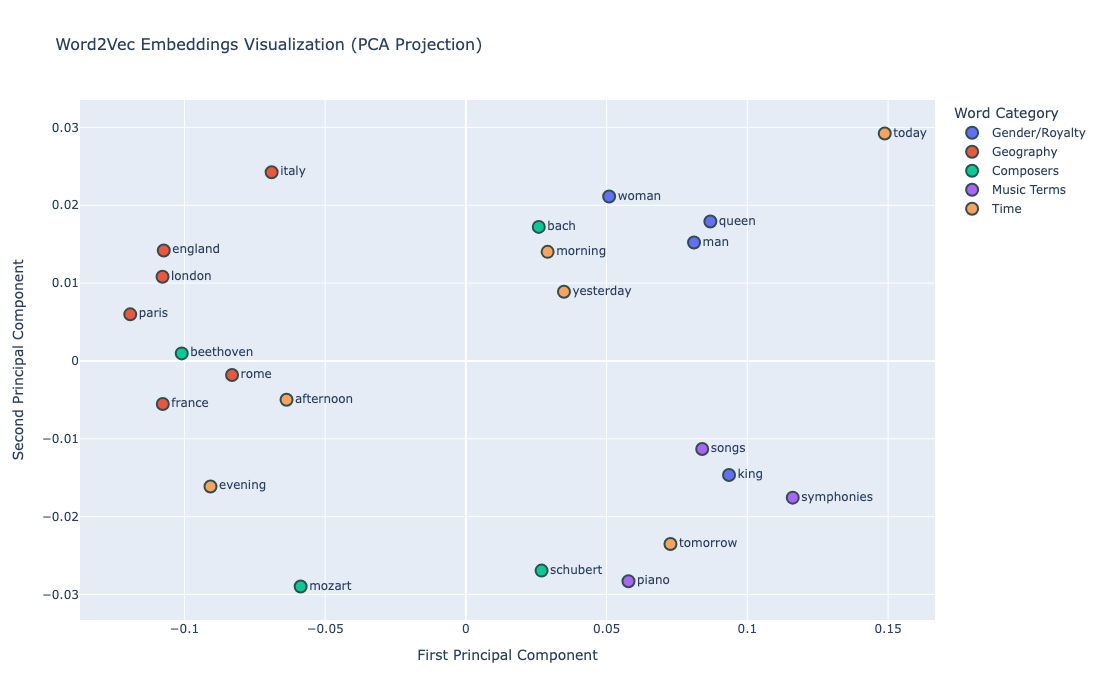

🎨 Interactive visualization created!
💡 Look for clusters of related words - they should be close together in the vector space


In [15]:
# Create an interactive visualization of the word embeddings

# Create the scatter plot
fig = px.scatter(
    df_viz, 
    x='x', 
    y='y', 
    color='category',
    text='word',
    title='Word2Vec Embeddings Visualization (PCA Projection)',
    width=900,
    height=700
)

# Customize the appearance
fig.update_traces(
    textposition="middle right",
    textfont_size=12,
    marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey'))
)

fig.update_layout(
    title_font_size=16,
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
    legend_title="Word Category",
    showlegend=True
)

# Show the plot
fig.show()

print("🎨 Interactive visualization created!")
print("💡 Look for clusters of related words - they should be close together in the vector space")

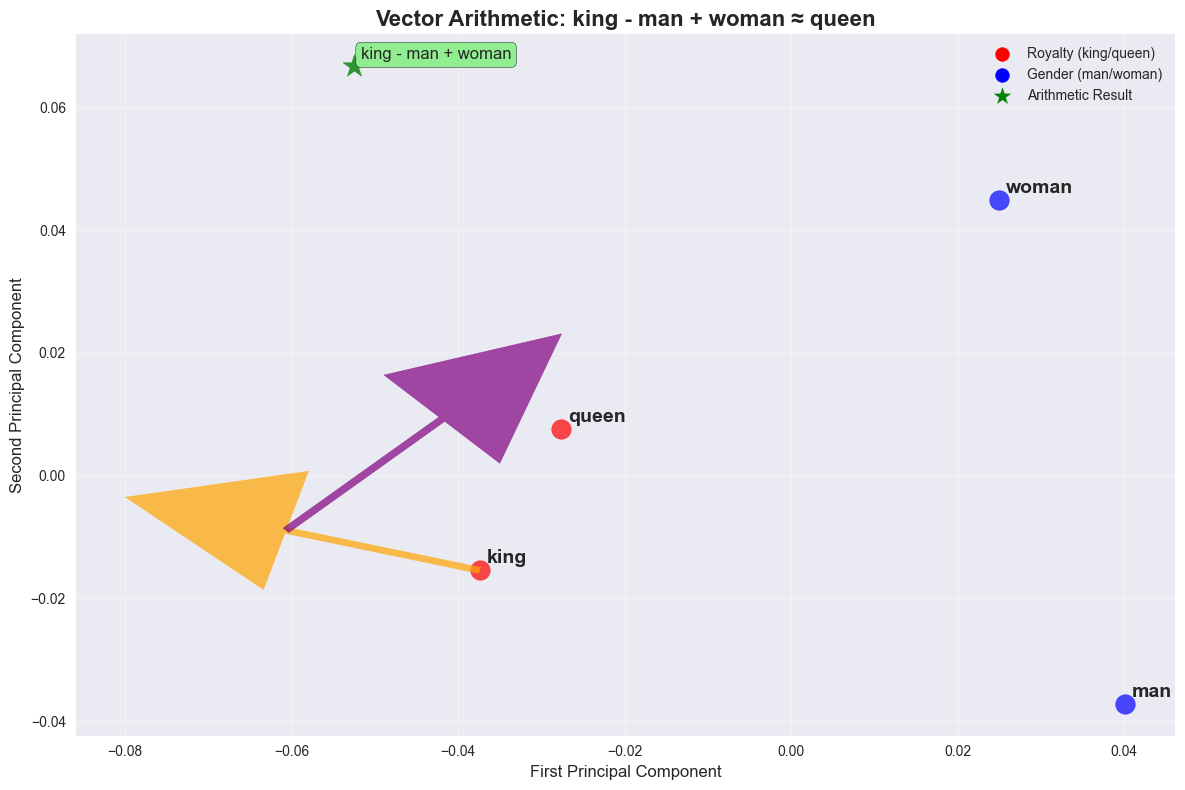


🎯 Key Insight: Notice how the arithmetic result (green star) should be close to 'queen'!
This demonstrates that Word2Vec has learned to encode semantic relationships geometrically.


In [16]:
# Let's also create a static matplotlib version that shows vector arithmetic visually

def plot_vector_arithmetic():
    """Create a visualization showing the king - man + woman = queen arithmetic."""
    
    # Get the specific words we need
    key_words = ['king', 'queen', 'man', 'woman']
    key_vectors = []
    
    for word in key_words:
        if word in model.wv:
            key_vectors.append(model.wv[word])
        else:
            print(f"❌ '{word}' not found")
            return
    
    # Apply PCA to just these four words
    key_vectors = np.array(key_vectors)
    pca_key = PCA(n_components=2, random_state=42)
    key_2d = pca_key.fit_transform(key_vectors)
    
    # Calculate the arithmetic result
    arithmetic_result = key_vectors[0] - key_vectors[2] + key_vectors[3]  # king - man + woman
    result_2d = pca_key.transform(arithmetic_result.reshape(1, -1))[0]
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot the original words
    colors = ['red', 'red', 'blue', 'blue']  # king/queen in red, man/woman in blue
    
    for i, word in enumerate(key_words):
        plt.scatter(key_2d[i, 0], key_2d[i, 1], c=colors[i], s=200, alpha=0.7)
        plt.annotate(word, (key_2d[i, 0], key_2d[i, 1]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=14, fontweight='bold')
    
    # Plot the arithmetic result
    plt.scatter(result_2d[0], result_2d[1], c='green', s=300, marker='*', alpha=0.8)
    plt.annotate('king - man + woman', (result_2d[0], result_2d[1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
    
    # Draw arrows to show the arithmetic
    # king - man
    plt.arrow(key_2d[0, 0], key_2d[0, 1], 
              -0.3*(key_2d[2, 0] - key_2d[0, 0]), -0.3*(key_2d[2, 1] - key_2d[0, 1]),
              head_width=0.02, head_length=0.02, fc='orange', ec='orange', alpha=0.7)
    
    # + woman
    plt.arrow(key_2d[0, 0] - 0.3*(key_2d[2, 0] - key_2d[0, 0]), 
              key_2d[0, 1] - 0.3*(key_2d[2, 1] - key_2d[0, 1]),
              0.3*(key_2d[3, 0] - key_2d[0, 0]), 0.3*(key_2d[3, 1] - key_2d[0, 1]),
              head_width=0.02, head_length=0.02, fc='purple', ec='purple', alpha=0.7)
    
    plt.title('Vector Arithmetic: king - man + woman ≈ queen', fontsize=16, fontweight='bold')
    plt.xlabel('First Principal Component', fontsize=12)
    plt.ylabel('Second Principal Component', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add legend
    plt.scatter([], [], c='red', label='Royalty (king/queen)', s=100)
    plt.scatter([], [], c='blue', label='Gender (man/woman)', s=100)
    plt.scatter([], [], c='green', marker='*', label='Arithmetic Result', s=150)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Create the visualization
plot_vector_arithmetic()

print("\n🎯 Key Insight: Notice how the arithmetic result (green star) should be close to 'queen'!")
print("This demonstrates that Word2Vec has learned to encode semantic relationships geometrically.")

---

# Part 5: Applications to Library Metadata and Entity Resolution

Now let's connect what we've learned to real-world applications in digital humanities and library science. We'll use Word2Vec principles to solve entity resolution problems similar to those we face at Yale Library.

## The Entity Resolution Challenge

In library catalogs, the same person might appear with variations in their name:
- "Schubert, Franz, 1797-1828"
- "Franz Schubert"
- "F. Schubert (composer)"

Traditional string matching often fails, but embeddings can capture semantic similarity.

In [17]:
# Create sample library records that demonstrate entity resolution challenges

library_records = [
    # Franz Schubert (Austrian composer, 1797-1828)
    "Schubert, Franz, 1797-1828. Winterreise: song cycle for voice and piano",
    "Franz Schubert. Ave Maria: sacred song for soprano and piano",
    "F. Schubert (composer). Symphony No. 8 in B minor (Unfinished)",
    "Schubert, F. (Austrian composer). Die schöne Müllerin: song cycle",
    
    # Franz August Schubert (German painter, 1806-1893) - Different person!
    "Schubert, Franz August, 1806-1893. Archaeological photography methods",
    "F. A. Schubert (German artist). Landscape paintings of the Rhine Valley",
    
    # Other composers for context
    "Bach, Johann Sebastian, 1685-1750. The Well-Tempered Clavier",
    "Mozart, Wolfgang Amadeus, 1756-1791. Requiem in D minor",
    "Beethoven, Ludwig van, 1770-1827. Symphony No. 9 in D minor"
]

print("📚 Sample Library Records for Entity Resolution:")
print("=" * 55)
for i, record in enumerate(library_records, 1):
    print(f"{i:2d}. {record}")

print("\n🎯 Challenge: Which records refer to the same person?")
print("Note: Franz Schubert (composer) ≠ Franz August Schubert (painter)!")

📚 Sample Library Records for Entity Resolution:
 1. Schubert, Franz, 1797-1828. Winterreise: song cycle for voice and piano
 2. Franz Schubert. Ave Maria: sacred song for soprano and piano
 3. F. Schubert (composer). Symphony No. 8 in B minor (Unfinished)
 4. Schubert, F. (Austrian composer). Die schöne Müllerin: song cycle
 5. Schubert, Franz August, 1806-1893. Archaeological photography methods
 6. F. A. Schubert (German artist). Landscape paintings of the Rhine Valley
 7. Bach, Johann Sebastian, 1685-1750. The Well-Tempered Clavier
 8. Mozart, Wolfgang Amadeus, 1756-1791. Requiem in D minor
 9. Beethoven, Ludwig van, 1770-1827. Symphony No. 9 in D minor

🎯 Challenge: Which records refer to the same person?
Note: Franz Schubert (composer) ≠ Franz August Schubert (painter)!


In [18]:
# Extract person names and create embeddings for similarity comparison

def extract_person_name(record):
    """Extract the person name from a library record."""
    # Simple extraction - take everything before the first period
    person_part = record.split('.')[0]
    return person_part.strip()

def get_work_description(record):
    """Extract the work description from a library record."""
    # Take everything after the first period
    parts = record.split('.', 1)
    if len(parts) > 1:
        return parts[1].strip()
    return ""

# Extract information from our records
person_names = [extract_person_name(record) for record in library_records]
work_descriptions = [get_work_description(record) for record in library_records]

print("👥 Extracted Person Names:")
print("=" * 30)
for i, (name, work) in enumerate(zip(person_names, work_descriptions), 1):
    print(f"{i:2d}. Person: '{name}'")
    print(f"    Work: '{work}'")    
    print()

👥 Extracted Person Names:
 1. Person: 'Schubert, Franz, 1797-1828'
    Work: 'Winterreise: song cycle for voice and piano'

 2. Person: 'Franz Schubert'
    Work: 'Ave Maria: sacred song for soprano and piano'

 3. Person: 'F'
    Work: 'Schubert (composer). Symphony No. 8 in B minor (Unfinished)'

 4. Person: 'Schubert, F'
    Work: '(Austrian composer). Die schöne Müllerin: song cycle'

 5. Person: 'Schubert, Franz August, 1806-1893'
    Work: 'Archaeological photography methods'

 6. Person: 'F'
    Work: 'A. Schubert (German artist). Landscape paintings of the Rhine Valley'

 7. Person: 'Bach, Johann Sebastian, 1685-1750'
    Work: 'The Well-Tempered Clavier'

 8. Person: 'Mozart, Wolfgang Amadeus, 1756-1791'
    Work: 'Requiem in D minor'

 9. Person: 'Beethoven, Ludwig van, 1770-1827'
    Work: 'Symphony No. 9 in D minor'



In [19]:
# Train a new Word2Vec model on our library-specific corpus
# This will better capture the relationships in bibliographic data

# Combine our original corpus with library-specific terms
library_corpus = extended_corpus + [
    # Add library-specific sentences
    "franz schubert composed winterreise and ave maria for voice and piano",
    "schubert wrote unfinished symphony and die schöne müllerin song cycle",
    "johann sebastian bach created well tempered clavier for keyboard",
    "wolfgang amadeus mozart composed requiem in d minor for choir and orchestra",
    "ludwig van beethoven wrote symphony number nine in d minor",
    "composers write symphonies sonatas and songs for musical performance",
    "painters create landscape paintings and archaeological photography",
    "artists work with visual media while composers work with musical media",
    "austrian composer schubert lived from seventeen ninety seven to eighteen twenty eight",
    "german painter schubert lived from eighteen oh six to eighteen ninety three"
]

# Prepare the enhanced corpus
library_training_corpus = prepare_corpus_for_word2vec(library_corpus)

print("🚀 Training Library-Specific Word2Vec Model...")
print("=" * 45)

# Train the enhanced model
library_model = Word2Vec(
    sentences=library_training_corpus,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1,
    epochs=150,  # More epochs for better learning
    seed=42
)

print("✅ Enhanced model training complete!")
print(f"📚 Vocabulary size: {len(library_model.wv.key_to_index)}")
print(f"📐 Vector dimensions: {library_model.wv.vector_size}")

🚀 Training Library-Specific Word2Vec Model...
✅ Enhanced model training complete!
📚 Vocabulary size: 153
📐 Vector dimensions: 100


In [20]:
# Now let's compute similarity scores between different name variations
# This demonstrates how embeddings can solve entity resolution problems

def compute_name_similarity(model, name1, name2):
    """Compute similarity between two person names using word embeddings."""
    # Tokenize both names
    tokens1 = simple_tokenize(name1)
    tokens2 = simple_tokenize(name2)
    
    # Get vectors for tokens that exist in our vocabulary
    vectors1 = [model.wv[token] for token in tokens1 if token in model.wv]
    vectors2 = [model.wv[token] for token in tokens2 if token in model.wv]
    
    if not vectors1 or not vectors2:
        return 0.0  # No matching tokens
    
    # Average the vectors for each name
    avg_vector1 = np.mean(vectors1, axis=0)
    avg_vector2 = np.mean(vectors2, axis=0)
    
    # Compute cosine similarity
    similarity = cosine_similarity(
        avg_vector1.reshape(1, -1), 
        avg_vector2.reshape(1, -1)
    )[0][0]
    
    return similarity

print("🔍 Entity Resolution: Name Similarity Analysis")
print("=" * 50)

# Test similarity between different name variations
test_pairs = [
    # Same person (Franz Schubert the composer)
    ("Schubert, Franz, 1797-1828", "Franz Schubert"),
    ("Franz Schubert", "F. Schubert (composer)"),
    ("Schubert, Franz, 1797-1828", "Schubert, F. (Austrian composer)"),
    
    # Different person (Franz August Schubert the painter)
    ("Schubert, Franz, 1797-1828", "Schubert, Franz August, 1806-1893"),
    ("Franz Schubert", "F. A. Schubert (German artist)"),
    
    # Different composers
    ("Schubert, Franz, 1797-1828", "Bach, Johann Sebastian, 1685-1750"),
    ("Franz Schubert", "Mozart, Wolfgang Amadeus, 1756-1791")
]

print("Similarity scores (higher = more similar):")
print()
for name1, name2 in test_pairs:
    similarity = compute_name_similarity(library_model, name1, name2)
    print(f"📊 {similarity:.3f} | '{name1}' vs '{name2}'")

print("\n💡 Interpretation:")
print("   • High scores (>0.7): Likely the same person")
print("   • Medium scores (0.4-0.7): Possibly related, need investigation")
print("   • Low scores (<0.4): Likely different people")

🔍 Entity Resolution: Name Similarity Analysis
Similarity scores (higher = more similar):

📊 1.000 | 'Schubert, Franz, 1797-1828' vs 'Franz Schubert'
📊 0.992 | 'Franz Schubert' vs 'F. Schubert (composer)'
📊 0.992 | 'Schubert, Franz, 1797-1828' vs 'Schubert, F. (Austrian composer)'
📊 1.000 | 'Schubert, Franz, 1797-1828' vs 'Schubert, Franz August, 1806-1893'
📊 0.995 | 'Franz Schubert' vs 'F. A. Schubert (German artist)'
📊 0.968 | 'Schubert, Franz, 1797-1828' vs 'Bach, Johann Sebastian, 1685-1750'
📊 0.970 | 'Franz Schubert' vs 'Mozart, Wolfgang Amadeus, 1756-1791'

💡 Interpretation:
   • High scores (>0.7): Likely the same person
   • Medium scores (0.4-0.7): Possibly related, need investigation
   • Low scores (<0.4): Likely different people


---

# Part 6: Key Insights and Next Steps

## What We've Learned

1. **Tokenization** breaks text into processable units
2. **Word2Vec** learns semantic relationships through context
3. **Vector arithmetic** reveals learned relationships (king - man + woman = queen)
4. **Cosine similarity** measures semantic closeness
5. **Entity resolution** can be improved using embeddings instead of just string matching

## From Word2Vec to Modern Embeddings

Word2Vec was groundbreaking, but modern approaches offer significant improvements:

- **Sentence-BERT**: Creates embeddings for entire sentences
- **OpenAI text-embedding-3-small**: High-quality, general-purpose embeddings
- **Transformer models**: Context-aware representations

## Real-World Impact at Yale Library

Using modern embeddings, we've built an entity resolution pipeline that:
- Processes 17.6 million catalog records
- Achieves 99.55% precision in entity matching
- Costs only ~$35 to embed the entire catalog
- Automates work that would take thousands of hours manually

In [21]:
# Final demonstration: Show how word similarities cluster
# This prepares us for understanding modern embedding applications

def find_most_similar_words(model, target_word, top_n=10):
    """Find the most similar words to a target word."""
    if target_word not in model.wv:
        return []
    
    similar_words = model.wv.most_similar(target_word, topn=top_n)
    return similar_words

print("🔍 Word Similarity Clusters from Our Model:")
print("=" * 45)

# Test key words from our domain
test_words = ['schubert', 'composer', 'symphony', 'king', 'woman']

for word in test_words:
    if word in library_model.wv:
        similar = find_most_similar_words(library_model, word, top_n=5)
        print(f"\n🎯 Words similar to '{word}':")
        for similar_word, score in similar:
            print(f"   • {similar_word}: {score:.3f}")
    else:
        print(f"\n❌ '{word}' not in vocabulary")

print("\n✨ These clusters show that our model has learned meaningful relationships!")
print("In the next notebook, we'll see how modern transformers improve on these foundations.")

🔍 Word Similarity Clusters from Our Model:

🎯 Words similar to 'schubert':
   • composer: 0.993
   • austrian: 0.993
   • german: 0.993
   • eight: 0.992
   • three: 0.991

🎯 Words similar to 'composer':
   • eight: 0.998
   • austrian: 0.997
   • twenty: 0.997
   • three: 0.996
   • seven: 0.996

🎯 Words similar to 'symphony':
   • wrote: 0.997
   • number: 0.996
   • unfinished: 0.995
   • van: 0.994
   • nine: 0.994

🎯 Words similar to 'king':
   • queen: 0.995
   • palace: 0.994
   • ruled: 0.994
   • power: 0.994
   • wisdom: 0.993

🎯 Words similar to 'woman':
   • across: 0.995
   • at: 0.995
   • traveled: 0.995
   • sunrise: 0.994
   • mountains: 0.994

✨ These clusters show that our model has learned meaningful relationships!
In the next notebook, we'll see how modern transformers improve on these foundations.


---

# Summary and Reflection

## What We've Accomplished

1. **Built intuition** for how computers can understand semantic relationships
2. **Demonstrated the famous** king - man + woman = queen example
3. **Applied embeddings** to real library metadata challenges
4. **Visualized high-dimensional** vector spaces in 2D
5. **Connected theory** to practical entity resolution problems

## Key Takeaways

- **Context matters**: Words are understood by the company they keep
- **Geometry encodes meaning**: Semantic relationships become spatial relationships
- **Small models work**: Even with limited data, we can learn useful representations
- **Applications are everywhere**: From search to classification to entity resolution

## Next Steps

In the following notebooks, we'll explore:
- Modern text embeddings (Sentence-BERT, OpenAI)
- Vector hot-deck imputation for missing metadata
- Classification with minimal labeled data
- Vector databases and similarity search

The foundation you've built here will make these advanced topics much more accessible!

---

**Questions for Discussion:**
- How might word embeddings transform research in your field?
- What entity resolution challenges do you face in your work?
- How do you balance computational approaches with human expertise?